In [1]:
import torch
import torch.nn as nn
import sys

sys.path.append('../Natural Language Processing/')

from NLP_utils import *
import matplotlib.pyplot as plt
import time

## Exploring `utils.py`

In [2]:
unicode_to_ascii('Ślusàrski ćar')

'Slusarski car'

In [3]:
letter_to_tensor('j') # One-hot ecoding

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

In [4]:
line_to_tensor('Jjmf;')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [5]:
ALL_LETTERS

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [6]:
N_LETTERS

57

# RNN

In [7]:
class RNN(nn.Module):
    # Can use nn.RNN, but will do from scratch
    def __init__(self, input_size, hidden_size, output_size) -> None:
        super(RNN, self).__init__() # Calling the super class __init__ function

        self.hidden_size = hidden_size

        self.in2hid = nn.Linear(input_size+hidden_size, hidden_size)
        self.hid2out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim = 1) # Input = (1,57) so will need to use the second dimension, hence dim = 1
    
    def forward(self, xt, a_prev): # One cell forward pass
        combined = torch.cat((xt, a_prev), 1) # Concat along dimension 1
        a_next = torch.tanh(self.in2hid(combined)) # Hidden state
        yt = self.softmax(self.hid2out(a_next))
        return(yt, a_next)
    
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

In [8]:
category_lines, all_categories = load_data()

# Number of categories -
# (Number of different languages .txt files we have)
n_categories = len(all_categories)
print(n_categories)

18


In [9]:
n_hidden = 256 # Hyperparameter we can set (Size of hidden state)

In [10]:
rnn = RNN(N_LETTERS, n_hidden, n_categories)

In [11]:
# One step through the RNN cell
input_tensor = letter_to_tensor('A')
hidden_tensor = rnn.init_hidden() # Vector of zeros

In [12]:
output, next_hidden = rnn(input_tensor, hidden_tensor)

In [13]:
print(output)

tensor([[-2.8993, -2.9503, -2.8739, -2.8985, -2.9314, -2.8535, -2.8265, -2.8821,
         -2.8706, -2.8562, -2.9161, -2.9449, -2.8855, -2.8267, -2.9089, -2.8872,
         -2.9096, -2.9167]], grad_fn=<LogSoftmaxBackward0>)


In [14]:
print(output.size()) # Number of categories
print(next_hidden.size()) # Hidden size

torch.Size([1, 18])
torch.Size([1, 256])


# Prediction Trial

In [15]:
input_tensor1 = line_to_tensor('Albert')
hidden_tensor1 = rnn.init_hidden()

In [16]:
input_tensor1.shape # (Number of letters, 1, Number of total possible ASCII characters = 57)

torch.Size([6, 1, 57])

In [17]:
output, next_hidden = rnn(input_tensor1[0], hidden_tensor1)
print(output.size())
print(next_hidden.size())
print(output)
print(next_hidden)

torch.Size([1, 18])
torch.Size([1, 256])
tensor([[-2.8993, -2.9503, -2.8739, -2.8985, -2.9314, -2.8535, -2.8265, -2.8821,
         -2.8706, -2.8562, -2.9161, -2.9449, -2.8855, -2.8267, -2.9089, -2.8872,
         -2.9096, -2.9167]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-4.0297e-02,  5.7325e-02, -1.0027e-01, -4.9636e-03,  6.3024e-02,
         -1.1499e-02, -6.9460e-02,  5.8719e-03, -4.7144e-03, -7.0287e-03,
         -5.6950e-02, -3.1921e-02, -2.8897e-03, -1.0278e-01, -4.7313e-02,
          7.1976e-02,  6.1608e-02, -2.6569e-02,  6.7411e-02,  4.3792e-02,
         -1.5999e-02,  2.1039e-02,  1.0089e-01,  4.4980e-03,  4.0374e-02,
         -8.3023e-02, -3.7333e-02, -3.4091e-03, -1.1490e-02,  4.6596e-03,
          2.4606e-02, -5.9593e-04,  2.2565e-02, -7.4961e-02,  9.5185e-02,
         -5.2928e-02,  3.5665e-02,  7.8452e-02, -1.9397e-02,  5.8726e-02,
          8.3423e-02, -6.0116e-02,  7.6419e-02,  3.0795e-02,  1.4793e-02,
         -3.3043e-03,  4.8663e-02, -5.3857e-02, -2.9841e-04,  1.3042e-0

In [18]:
torch.argmax(output)

tensor(6)

In [19]:
all_categories

['Czech',
 'German',
 'Arabic',
 'Japanese',
 'Chinese',
 'Vietnamese',
 'Russian',
 'French',
 'Irish',
 'English',
 'Spanish',
 'Greek',
 'Italian',
 'Portuguese',
 'Scottish',
 'Dutch',
 'Korean',
 'Polish']

In [20]:
def category_from_output(output):
    idx = torch.argmax(output).item()
    return all_categories[idx] # Returns the respective language

In [21]:
print(category_from_output(output)) # Its untrained hence it prints any random language

Russian


# Training

In [22]:
criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr = learning_rate)

In [23]:
def train(line_tensor, category_tensor):
    """
        line_tensor: Whole line as a tensor of one_hot encoded letters
        category_tensor: index of the class label in one-hot encoded form of shape - [1, n_categories] (n_categories = 18 here)
    """
    hidden = rnn.init_hidden()

    for i in range(line_tensor.shape[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return output, loss.item() # Loss as float value

In [24]:
current_loss = 0
all_losses = []

# After 1000 steps - plot
# After 5000 steps - print
plot_steps, print_steps = 1000, 5000 
n_iters = 100000

In [25]:
category_lines

{'Czech': ['Abl',
  'Adsit',
  'Ajdrna',
  'Alt',
  'Antonowitsch',
  'Antonowitz',
  'Bacon',
  'Ballalatak',
  'Ballaltick',
  'Bartonova',
  'Bastl',
  'Baroch',
  'Benesch',
  'Betlach',
  'Biganska',
  'Bilek',
  'Blahut',
  'Blazek',
  'Blazek',
  'Blazejovsky',
  'Blecha',
  'Bleskan',
  'Blober',
  'Bock',
  'Bohac',
  'Bohunovsky',
  'Bolcar',
  'Borovka',
  'Borovski',
  'Borowski',
  'Borovsky',
  'Brabbery',
  'Brezovjak',
  'Brousil',
  'Bruckner',
  'Buchta',
  'Cablikova',
  'Camfrlova',
  'Cap',
  'Cerda',
  'Cermak',
  'Chermak',
  'Cermak',
  'Cernochova',
  'Cernohous',
  'Cerny',
  'Cerney',
  'Cerny',
  'Cerv',
  'Cervenka',
  'Chalupka',
  'Charlott',
  'Chemlik',
  'Chicken',
  'Chilar',
  'Chromy',
  'Cihak',
  'Clineburg',
  'Klineberg',
  'Cober',
  'Colling',
  'Cvacek',
  'Czabal',
  'Damell',
  'Demall',
  'Dehmel',
  'Dana',
  'Dejmal',
  'Dempko',
  'Demko',
  'Dinko',
  'Divoky',
  'Dolejsi',
  'Dolezal',
  'Doljs',
  'Dopita',
  'Drassal',
  'Driml',
  

In [26]:
all_categories

['Czech',
 'German',
 'Arabic',
 'Japanese',
 'Chinese',
 'Vietnamese',
 'Russian',
 'French',
 'Irish',
 'English',
 'Spanish',
 'Greek',
 'Italian',
 'Portuguese',
 'Scottish',
 'Dutch',
 'Korean',
 'Polish']

In [27]:
tic = time.time()
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines = category_lines, all_categories = all_categories)
    output, loss = train(line_tensor, category_tensor) # One iteration of training
    current_loss+=loss

    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
    
    if (i+1) % print_steps == 0:
        prediction = category_from_output(output)
        # category = true category label
        # Basically we do a single prediction every 5000 steps (= print_steps)
        correct = "CORRECT!" if prediction == category else f'WRONG! ({category})'
        print(f'Epoch {i+1}; {(i+1)/n_iters * 100:.0f}% complete; Loss = {loss:.4f}; {line} / {prediction} {correct}')
print(f'Finished Training in {(time.time()-tic)/60:.0f}m {(time.time()-tic)%60:.0f}s')

Epoch 5000; 5% complete; Loss = 2.6111; Damell / Japanese WRONG! (Czech)
Epoch 10000; 10% complete; Loss = 3.1091; Seto / Italian WRONG! (Chinese)
Epoch 15000; 15% complete; Loss = 1.2674; Koza / Czech CORRECT!
Epoch 20000; 20% complete; Loss = 1.0998; Uehara / Japanese CORRECT!
Epoch 25000; 25% complete; Loss = 0.6078; Abreu / Portuguese CORRECT!
Epoch 30000; 30% complete; Loss = 0.4481; Hamilton / Scottish CORRECT!
Epoch 35000; 35% complete; Loss = 0.3785; Mersinias / Greek CORRECT!
Epoch 40000; 40% complete; Loss = 2.2290; Reiher / Dutch WRONG! (German)
Epoch 45000; 45% complete; Loss = 0.4921; Huan / Chinese CORRECT!
Epoch 50000; 50% complete; Loss = 0.3047; Uchiyama / Japanese CORRECT!
Epoch 55000; 55% complete; Loss = 0.0910; Henriques / Portuguese CORRECT!
Epoch 60000; 60% complete; Loss = 0.0652; Rudawski / Polish CORRECT!
Epoch 65000; 65% complete; Loss = 6.9474; Wang / Chinese WRONG! (English)
Epoch 70000; 70% complete; Loss = 1.2378; Breitbarth / German CORRECT!
Epoch 75000;

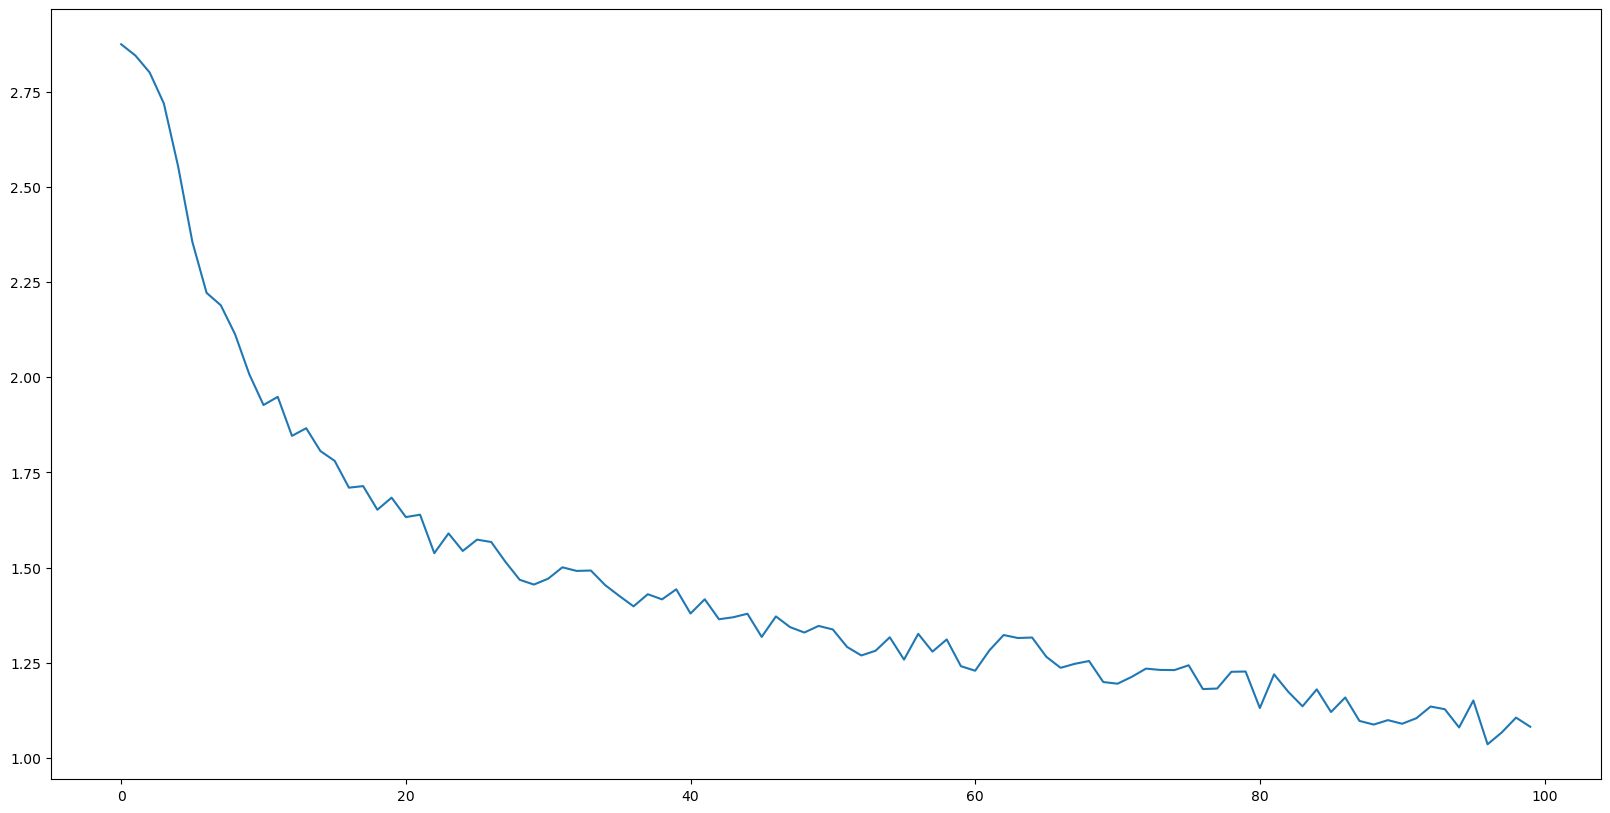

In [28]:
plt.figure(figsize = (20,10))
plt.plot(all_losses)
plt.show()

In [29]:
def predict(input_line):
    print(f'\n> {input_line}')
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)
        hidden = rnn.init_hidden()

        for i in range(line_tensor.shape[0] - 1):
            _, hidden = rnn(line_tensor[i], hidden)

        output, hidden = rnn(line_tensor[i+1], hidden)
        prediction = category_from_output(output)
        print('Prediction:', prediction)

In [30]:
while True:
    sentence = input("INPUT: ")
    if sentence == 'quit':
        break
    predict(sentence)


> Bao
Prediction: Chinese

> Gerard
Prediction: Irish

> O'Connell
Prediction: Irish

> Richman
Prediction: English

> Mahmood
Prediction: Arabic

> Abl
Prediction: German
